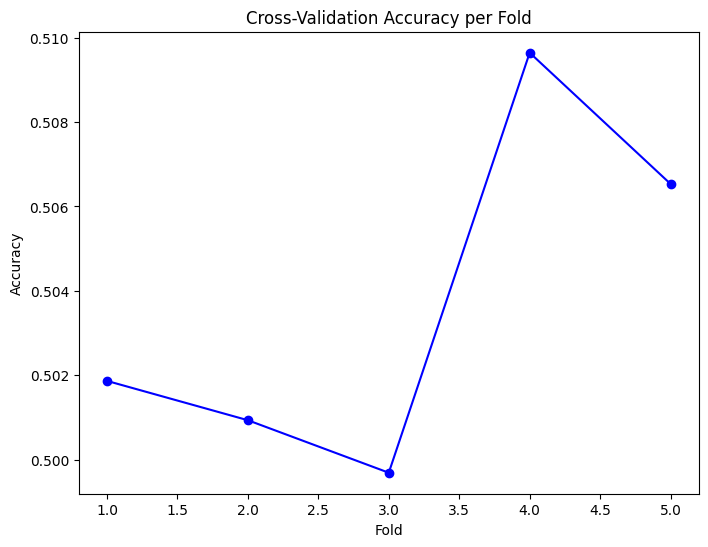

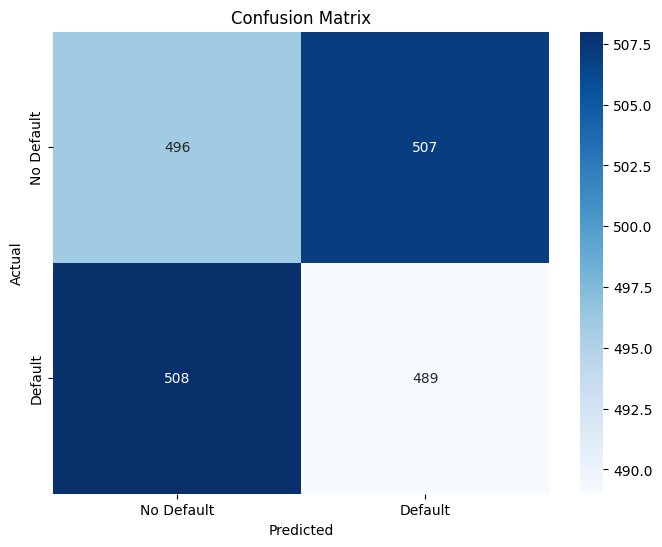

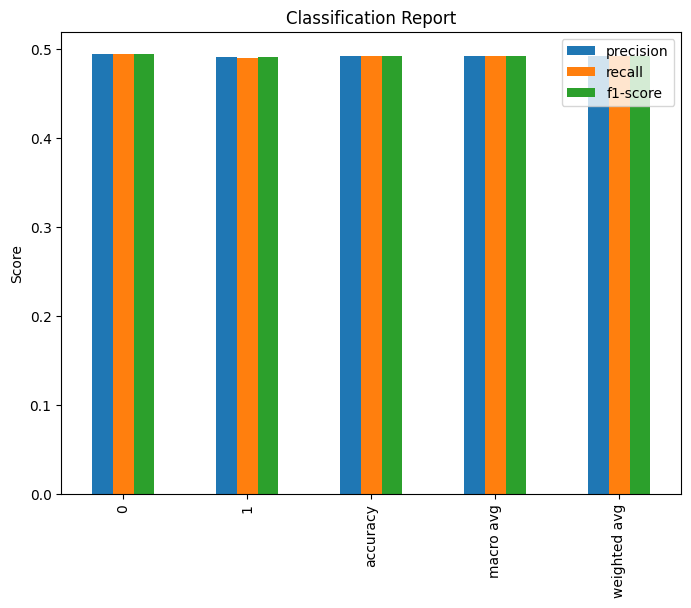

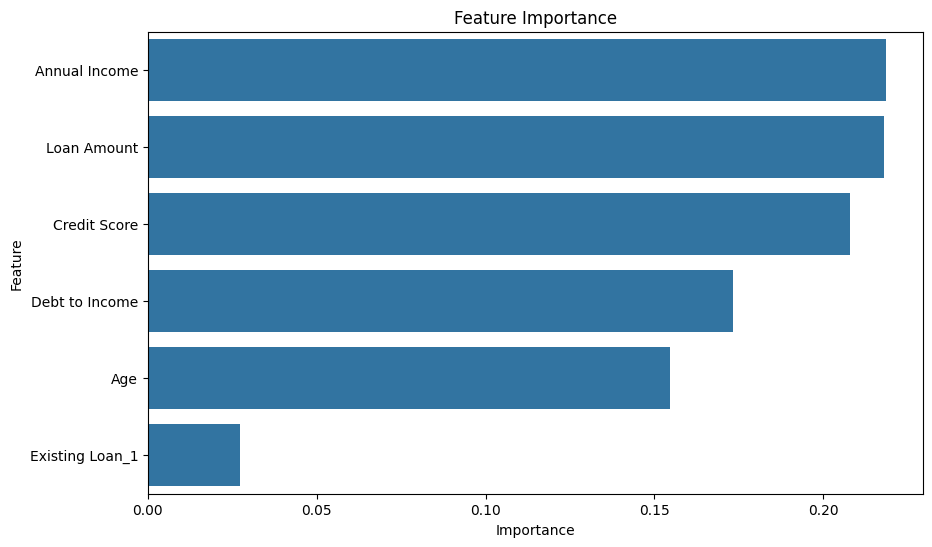

In [2]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os

# Load the trained model
model_path = 'models/credit_risk_model.pkl'
model = joblib.load(model_path)

# Load the test data (X_test and y_test)
splits_path = 'data/splits/'

X_test = pd.read_csv(os.path.join(splits_path, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(splits_path, 'y_test.csv'))

# Step 1: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 2: Cross-validation accuracy plot (If available, from previous steps)
cv_scores = [0.50186567, 0.50093342, 0.49968886, 0.5096453, 0.50653391]
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# Step 3: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 4: Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 6))
plt.title('Classification Report')
plt.ylabel('Score')
plt.show()

# Step 5: Feature Importance Visualization
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.show()
